<a href="https://colab.research.google.com/github/santimirandarp/mlnotebook/blob/main/2L_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification with 2L-NN




## Data 
1. Source: [From this site](https://machinelearningmastery.com/results-for-standard-classification-and-regression-machine-learning-datasets/)
2. Load data
3. Explore
4. Generate Datasets


In [120]:
import pandas as pd # to load csv
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plots
dataUrl = "https://raw.githubusercontent.com/santimirandarp/mlnotebook/main/diabetes.csv"
df = pd.read_csv(dataUrl)
df.head()
# df.columns.values


,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


### Explore the data
1. Balance between 0 and 1 (biased?)
2. size (rows and cols)

In [121]:
balance = df.iloc[:, -1:].value_counts()
samples = df.shape[0]
features = df.shape[1]-1 # one is labels
print("values of 1 and 0:", balance)
print("values of samples:", samples)
print("values of features:", features)

values of 1 and 0: 1
0    500
1    267
dtype: int64
values of samples: 767
values of features: 8


### Generate datasets
* Split train and validation dset
* Store in object "data"
* Convert each to numpy ndarray
* print info

In [122]:
ix = -int(np.floor(np.sqrt(df.shape[0]))) #to build test dataset

data = {
    "tf": df.iloc[:ix,:-1], 
    "tl": df.iloc[:ix,-1:], 
    "vf": df.iloc[ix:,:-1], 
    "vl": df.iloc[ix:,-1:]
    }

#data to numpy n-dimensional arrays
train_X = data["tf"].to_numpy().T
train_Y = data["tl"].to_numpy().T
test_X = data["vf"].to_numpy().T
test_Y = data["vl"].to_numpy().T

#print info
print("training m, validation m: ", train_X.shape[0],",", -ix)
print("m, features:", train_X.shape)
print("m, nodes:", train_Y.shape)
 

training m, validation m:  8 , 27
m, features: (8, 740)
m, nodes: (1, 740)


## Model

* To start with, let's represent a simplified model
* We have 7 nodes in the input layer
* The rest is the same
# <img src="https://raw.githubusercontent.com/santimirandarp/mlnotebook/main/model.png" style="width:400px"/>

In [123]:
m = train_X.shape[1] 
print(m)

740


### sigmoid
We are classifying data, hence we use sigmoid. Numpy does not have it defined. 

It does have tanh used for hidden layers, so we don't define it.

In [124]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

### Initialize parameters
These are the W and B matrices, which in the end are the parameters for linear equations (Z(w1,w2,w3..)). 

We have to initialize them, W needs to be randomly initialized, or the neurons will compute the same thing.

In [126]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    # same seed produces same random matrices.
    np.random.seed(2) 

    ### matrices needed for each layer (1 and 2)
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
       
    # python dictionary
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}   
    return parameters

### Forward Propagation
1. Use W, B for each layer
2. Use training samples X
3. Compute the Cost using $A_2$ and $Y$.

In [127]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X) + b1 
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache

In [128]:

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs = np.multiply(Y, np.log(A2)) + np.multiply(1-Y, np.log(1-A2)) 
    cost = -1/m*np.sum(logprobs)
    ### END CODE HERE ###
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    
    return cost

### Backward Propagation
1. Using cache matrices

In [129]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters['W1']
    W2 = parameters['W2']
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache['A1']
    A2 = cache['A2']
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [130]:
def update_parameters(parameters, grads, learning_rate=0.1):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # gradients
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    # update
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [131]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False, lr=0.1):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    err = []
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate=lr)
         
        # Print the cost every 1000 iterations
        if cost and i%1000==0:
            err.append(cost)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    return parameters, err



0.1
0.3
1


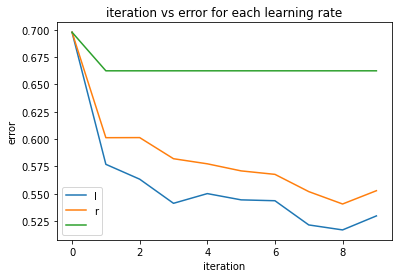

In [132]:
# test with != learning rates
lrs = [0.1, 0.3, 1]
for count, lr in enumerate(lrs):
  print(lr)    
  parameters, err = nn_model(train_X, train_Y, 8, num_iterations=10000, print_cost=False, lr=lr)
  plt.plot(err)
  plt.title("iteration vs error for each learning rate")
  plt.xlabel("iteration")
  plt.ylabel("error")
  plt.legend("lr {}".format(count))
plt.show()

# Prediction

In [133]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    ### END CODE HERE ###
    
    return predictions

In [134]:
# with 4 n_h
parameters = nn_model(train_X, train_Y, n_h = 4, num_iterations=10000, print_cost=True)


Cost after iteration 0: 0.695590
Cost after iteration 1000: 0.598409
Cost after iteration 2000: 0.578476
Cost after iteration 3000: 0.585875
Cost after iteration 4000: 0.576766
Cost after iteration 5000: 0.578816
Cost after iteration 6000: 0.573656
Cost after iteration 7000: 0.584919
Cost after iteration 8000: 0.578139
Cost after iteration 9000: 0.575267


In [149]:
# with 8 n_h
parameters,err = nn_model(train_X, train_Y, n_h = 8, num_iterations=20000, print_cost=True)


Cost after iteration 0: 0.697644
Cost after iteration 1000: 0.576866
Cost after iteration 2000: 0.563275
Cost after iteration 3000: 0.541221
Cost after iteration 4000: 0.550095
Cost after iteration 5000: 0.544372
Cost after iteration 6000: 0.543575
Cost after iteration 7000: 0.521443
Cost after iteration 8000: 0.516890
Cost after iteration 9000: 0.529704
Cost after iteration 10000: 0.505434
Cost after iteration 11000: 0.509559
Cost after iteration 12000: 0.508616
Cost after iteration 13000: 0.510163
Cost after iteration 14000: 0.498962
Cost after iteration 15000: 0.516798
Cost after iteration 16000: 0.511749
Cost after iteration 17000: 0.501131
Cost after iteration 18000: 0.501529
Cost after iteration 19000: 0.503775


In [145]:
predictions = predict(parameters, test_X)
print ('Accuracy: %d' % float((np.dot(test_Y, predictions.T) + np.dot(1 - test_Y, 1 - predictions.T)) / float(test_Y.size) * 100) + '%')

Accuracy: 77%
